In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.stats.weightstats import ztest

1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name".

In [52]:
df = pd.read_csv (r'C:\Users\ADAM\Downloads\employee.csv',index_col='name')
df = pd.DataFrame(df, columns= ['age','income','gender','department','grade','performance_score'])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [53]:
df.index

Index(['Allen Smith', 'S Kumar', 'Jack Morgan', 'Ying Chin', 'Dheeraj Patel',
       'Satyam Sharma', 'James Authur', 'Josh Wills', 'Leo Duck'],
      dtype='object', name='name')

In [54]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [55]:
df.shape

(9, 6)

In [56]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


3. Select rows for specific names Jack Morgan and Josh wills.

In [58]:
df.loc[ ['Jack Morgan' , 'Josh Wills'] , : ]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


4. Select data for multiple values "Sales" and “Finance”.

In [59]:
df[(df['department']=='Sales') | (df['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


5. Display employee who has more than 700 performance score.

In [60]:
df[(df['performance_score'] >= 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


6. Display employee who has more than 500 and less than 700 performance score

In [61]:
df[(df['performance_score'] >= 500) & (df['performance_score'] <= 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


7. Check and handle missing values in the dataset.

In [62]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [63]:
df['income']=df['income'].fillna(df['income'].mean())
# df['gender']=df['gender'].fillna(df['gender'].mode().iloc[0])
df['gender']=df['gender'].fillna('T')
df['age']=df['age'].fillna(df['age'].median())
print(df.isna().sum(),df)


age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64                 age        income gender  department grade  performance_score
name                                                                         
Allen Smith    45.0  52857.142857      T  Operations    G3                723
S Kumar        45.0  16000.000000      F     Finance    G0                520
Jack Morgan    32.0  35000.000000      M     Finance    G2                674
Ying Chin      45.0  65000.000000      F       Sales    G3                556
Dheeraj Patel  30.0  42000.000000      F  Operations    G2                711
Satyam Sharma  45.0  62000.000000      T       Sales    G3                649
James Authur   54.0  52857.142857      F  Operations    G3                 53
Josh Wills     54.0  52000.000000      F     Finance    G3                901
Leo Duck       23.0  98000.000000      M       Sales    G4           

8. Check the outliers and handle outliers in performance score using Percentiles.

674.0


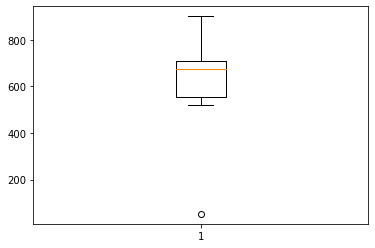

In [64]:
print(df['performance_score'].median())
plt.boxplot(df['performance_score'])
plt.show()

In [65]:
q1 = np.percentile(df['performance_score'],25,interpolation='midpoint')
q2 = np.percentile(df['performance_score'],50,interpolation='midpoint')
q3 = np.percentile(df['performance_score'],75,interpolation='midpoint')
print(q1,q2,q3)
Iqr = q3-q1
l_lim=q1-1.5*Iqr
u_lim=q3+1.5*Iqr
print(Iqr,l_lim,u_lim)
outlier=[]
for x in df['performance_score']:
    if((x>u_lim)|(x<l_lim)):
        outlier.append(x)
print(outlier)

556.0 674.0 711.0
155.0 323.5 943.5
[53]


In [66]:
print(df.loc[df['performance_score']<l_lim].index)
df.drop(['James Authur'],inplace=True)
df

Index(['James Authur'], dtype='object', name='name')


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,T,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,T,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


9. Check the gender column and do Dummy encoding.

In [70]:
dfencod=pd.get_dummies(df,prefix="gender",columns=["gender"])
dfencod

,age,income,department,grade,performance_score,gender_F,gender_M,gender_T
name,,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,0,0,1
S Kumar,45.0,16000.000000,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1,0


10.Do the standard scaling on the feature performance score

In [67]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()

In [71]:
dfencod=pd.get_dummies(df,prefix="gender",columns=["gender"])
dfencod=pd.get_dummies(dfencod,prefix="grade",columns=["grade"])
dfencod=pd.get_dummies(dfencod,prefix="dept",columns=["department"])
x = standardisation.fit_transform(dfencod)
x =pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,-2.775558e-17,1.110223e-16,4.857226e-17,0.000000,-2.775558e-17,-2.775558e-17,-6.938894e-17,-2.775558e-17,0.000000,-5.551115e-17,-2.775558e-17,-2.775558e-17,-2.775558e-17
std,1.069045e+00,1.069045e+00,1.069045e+00,1.069045,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00
min,-1.744151e+00,-1.635099e+00,-1.475872e+00,-1.000000,-5.773503e-01,-5.773503e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01
25%,-8.656157e-01,-5.592925e-01,-5.026938e-01,-1.000000,-5.773503e-01,-5.773503e-01,-3.779645e-01,-5.773503e-01,-1.000000,-3.779645e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01
50%,5.297052e-01,-1.901278e-02,1.023793e-01,0.000000,-5.773503e-01,-5.773503e-01,-3.779645e-01,-5.773503e-01,0.000000,-3.779645e-01,-7.745967e-01,-5.773503e-01,-7.745967e-01
75%,5.297052e-01,4.388783e-01,3.094385e-01,1.000000,0.000000e+00,0.000000e+00,-3.779645e-01,0.000000e+00,1.000000,-3.779645e-01,1.290994e+00,0.000000e+00,1.290994e+00
max,1.459919e+00,2.002679e+00,2.030331e+00,1.000000,1.732051e+00,1.732051e+00,2.645751e+00,1.732051e+00,1.000000,2.645751e+00,1.290994e+00,1.732051e+00,1.290994e+00


In [68]:
df.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    57964.285714
G4    98000.000000
Name: income, dtype: float64

In [ ]:
# i=df['department'].unique()
# j=df['grade'].unique()
# for i in i:
#     print(i)
#     print("difference in income between grade G4-G3 in a department is",df[(df['department']==i) & (df['grade']=='G4')][['income']].mean()-df[(df['department']==i) & (df['grade']=='G3')][['income']].mean())
#     print("difference in income between grade G3-G2 in a department is",df[(df['department']==i) & (df['grade']=='G3')][['income']].mean()-df[(df['department']==i) & (df['grade']=='G2')][['income']].mean())
#     print("difference in income between grade G2-G1 in a department is",df[(df['department']==i) & (df['grade']=='G2')][['income']].mean()-df[(df['department']==i) & (df['grade']=='G1')][['income']].mean())
#     print("difference in income between grade G1-G0 in a department is",df[(df['department']==i) & (df['grade']=='G1')][['income']].mean()-df[(df['department']==i) & (df['grade']=='G0')][['income']].mean())